In [2]:
import pandas as pd

# モデル学習・評価
1. データ読み込み
2. データ前処理
    - ベースラインモデル用
    - ガチ
3. データ分割
4. モデル学習
5. モデル評価
6. csvファイル出力<br>
※ データ前処理は別のipynbファイルで実行すること<br>
※ ベースラインモデル用の最低限の前処理のみ実行

## 1.データの読込

In [139]:
# データの読込

# 訓練データ
train_df = pd.read_csv("../data/train.csv")

# テストデータ
test_df = pd.read_csv("../data/test.csv")

display(train_df.head())
display(test_df.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
print("訓練データ")
print("テーブルデータの形状")
print(train_df.shape)
print(train_df.info())

訓練データ
テーブルデータの形状
(8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [5]:
print("テストデータ")
print("テーブルデータの形状")
print(test_df.shape)
print(test_df.info())

テストデータ
テーブルデータの形状
(4277, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


## 2. データ前処理
### ベースライン用
- 欠損値
- PassengerId：列削除
- HomePlanet：One-Hotエンコーディング
- CryoSleep：bool型 -> float型
- Cabin：列削除（One-hotエンコーディングできない）
- Destination：OneHotエンコーディング
- VIP：bool型 -> float型
- Name：列削除

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
"""
欠損値削除
"""
# 削除しない場合（上から実行できるように）
train_df_dropped = train_df.copy()
test_df_dropped = test_df.copy()

# 欠損値を含む行の削除
    # pd.concatはindexが一致していないといけないため、削除後にリセット
# train_df_dropped = train_df.dropna().reset_index(drop=True)
# test_df_dropped = test_df.dropna().reset_index(drop=True)

In [119]:
"""
One-Hotエンコーディング
"""
# One-hotエンコーディング対象の説明変数
target_feat = ["HomePlanet", "Destination"]

# インスタンス作成
    # drop='first'で1つのカテゴリを除外
one_enc = OneHotEncoder(drop='first', sparse_output=False)

# エンコーディング（出力 np.ndarray)
train_encoded = one_enc.fit_transform(train_df_dropped[target_feat])
test_encoded = one_enc.transform(test_df_dropped[target_feat])

# データフレーム作成（エンコーディングされたデータのみ）
train_df_encoded = pd.DataFrame(data=train_encoded, columns=one_enc.get_feature_names_out())
test_df_encoded = pd.DataFrame(data=test_encoded, columns=one_enc.get_feature_names_out())

In [120]:
print(train_df_encoded.shape, train_df_dropped.shape)

(8693, 6) (8693, 14)


In [123]:
train_df_encoded["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [121]:
# データフレーム結合
train_df_encoded = pd.concat([train_df_dropped.drop(columns=target_feat), train_df_encoded], axis=1)
test_df_encoded = pd.concat([test_df_dropped.drop(columns=target_feat), test_df_encoded], axis=1)

In [124]:
"""
bool型 -> float型
"""

# CryoSleep
train_df_encoded["CryoSleep"] = train_df_encoded["CryoSleep"].astype(float)
test_df_encoded["CryoSleep"] = test_df_encoded["CryoSleep"].astype(float)

# VIP
train_df_encoded["VIP"] = train_df_encoded["VIP"].astype(float)
test_df_encoded["VIP"] = test_df_encoded["VIP"].astype(float)

# Transported
train_df_encoded["Transported"] = train_df_encoded["Transported"].astype(float)

In [125]:
"""
列削除
"""

remove_feat = ["Name", "Cabin", "PassengerId"]

train_df_encoded = train_df_encoded.drop(columns=remove_feat)
test_df_encoded = test_df_encoded.drop(columns=remove_feat)

In [126]:
print(train_df_encoded.shape, test_df_encoded.shape)

(8693, 15) (4277, 14)


### 本気データ前処理
### 特徴量の作成
- PassengerIdの'gggg'、'pp'分割
- Cabinをside/deck/numに分割
- NameをFirst NameとLast Nameに分割
- RoomService等から合計金額（支出）の算出


In [140]:
"""Passenger"""
train_df[["Group", "Person"]] = train_df["PassengerId"].str.split("_", expand=True)

# 元のカラムの削除
train_df.drop(columns=["PassengerId"], inplace=True)

train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Person
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [141]:
print(train_df["Group"].unique())
print(train_df["Group"].nunique())

['0001' '0002' '0003' ... '9278' '9279' '9280']
6217


In [142]:
print(train_df["Person"].unique())
print(train_df["Person"].nunique())

display(train_df["Person"].value_counts())

['01' '02' '03' '04' '05' '06' '07' '08']
8


01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: Person, dtype: int64

In [143]:
"""Cabin"""
train_df[["Deck", "Num", "Side"]] = train_df["Cabin"].str.split("/", expand=True)

# 元のカラム削除
train_df.drop(columns=["Cabin"], inplace=True)
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Person,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


In [144]:
print(train_df["Deck"].unique())
print(train_df["Deck"].nunique())

display(train_df["Deck"].value_counts())

['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
8


F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [145]:
print(train_df["Num"].unique())
print(train_df["Num"].nunique())

display(train_df["Num"].value_counts())

['0' '1' '2' ... '1892' '1893' '1894']
1817


82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Num, Length: 1817, dtype: int64

In [146]:
print(train_df["Side"].unique())
print(train_df["Side"].nunique())

display(train_df["Side"].value_counts())

['P' 'S' nan]
2


S    4288
P    4206
Name: Side, dtype: int64

In [147]:
"""Name"""
train_df[["First_Name", "Last_Name"]] = train_df["Name"].str.split(" ", expand=True)

# 元のカラム削除
train_df.drop(columns=["Name"], inplace=True)

train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Person,Deck,Num,Side,First_Name,Last_Name
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S,Willy,Santantines


In [148]:
"Expense"
train_df["Expense"] = train_df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Person,Deck,Num,Side,First_Name,Last_Name,Expense
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P,Maham,Ofracculy,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S,Juanna,Vines,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S,Altark,Susent,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S,Solam,Susent,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S,Willy,Santantines,1091.0


In [149]:
# データ前処理の関数か
def process(df):
    df[['Group', 'Person']] = df['PassengerId'].str.split('_', expand=True)
    df.drop('PassengerId', axis=1, inplace=True)

    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df.drop('Cabin', axis=1, inplace=True)

    df[['First_Name', 'Last_Name']] = df['Name'].str.split(' ', expand=True)
    df.drop('Name', axis=1, inplace=True)

    df['Expense'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [150]:
# テストデータに適用

process(test_df)

### 欠損値の削除
- 数値データ：中央値
- カテゴリカルデータ：最頻値
- Name： 'Unknown'埋め

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [152]:
train_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Group             0
Person            0
Deck            199
Num             199
Side            199
First_Name      200
Last_Name       200
Expense           0
dtype: int64

In [153]:
# 変数の種類ごとに分類
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expense']
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Num', 'Deck', 'Side']

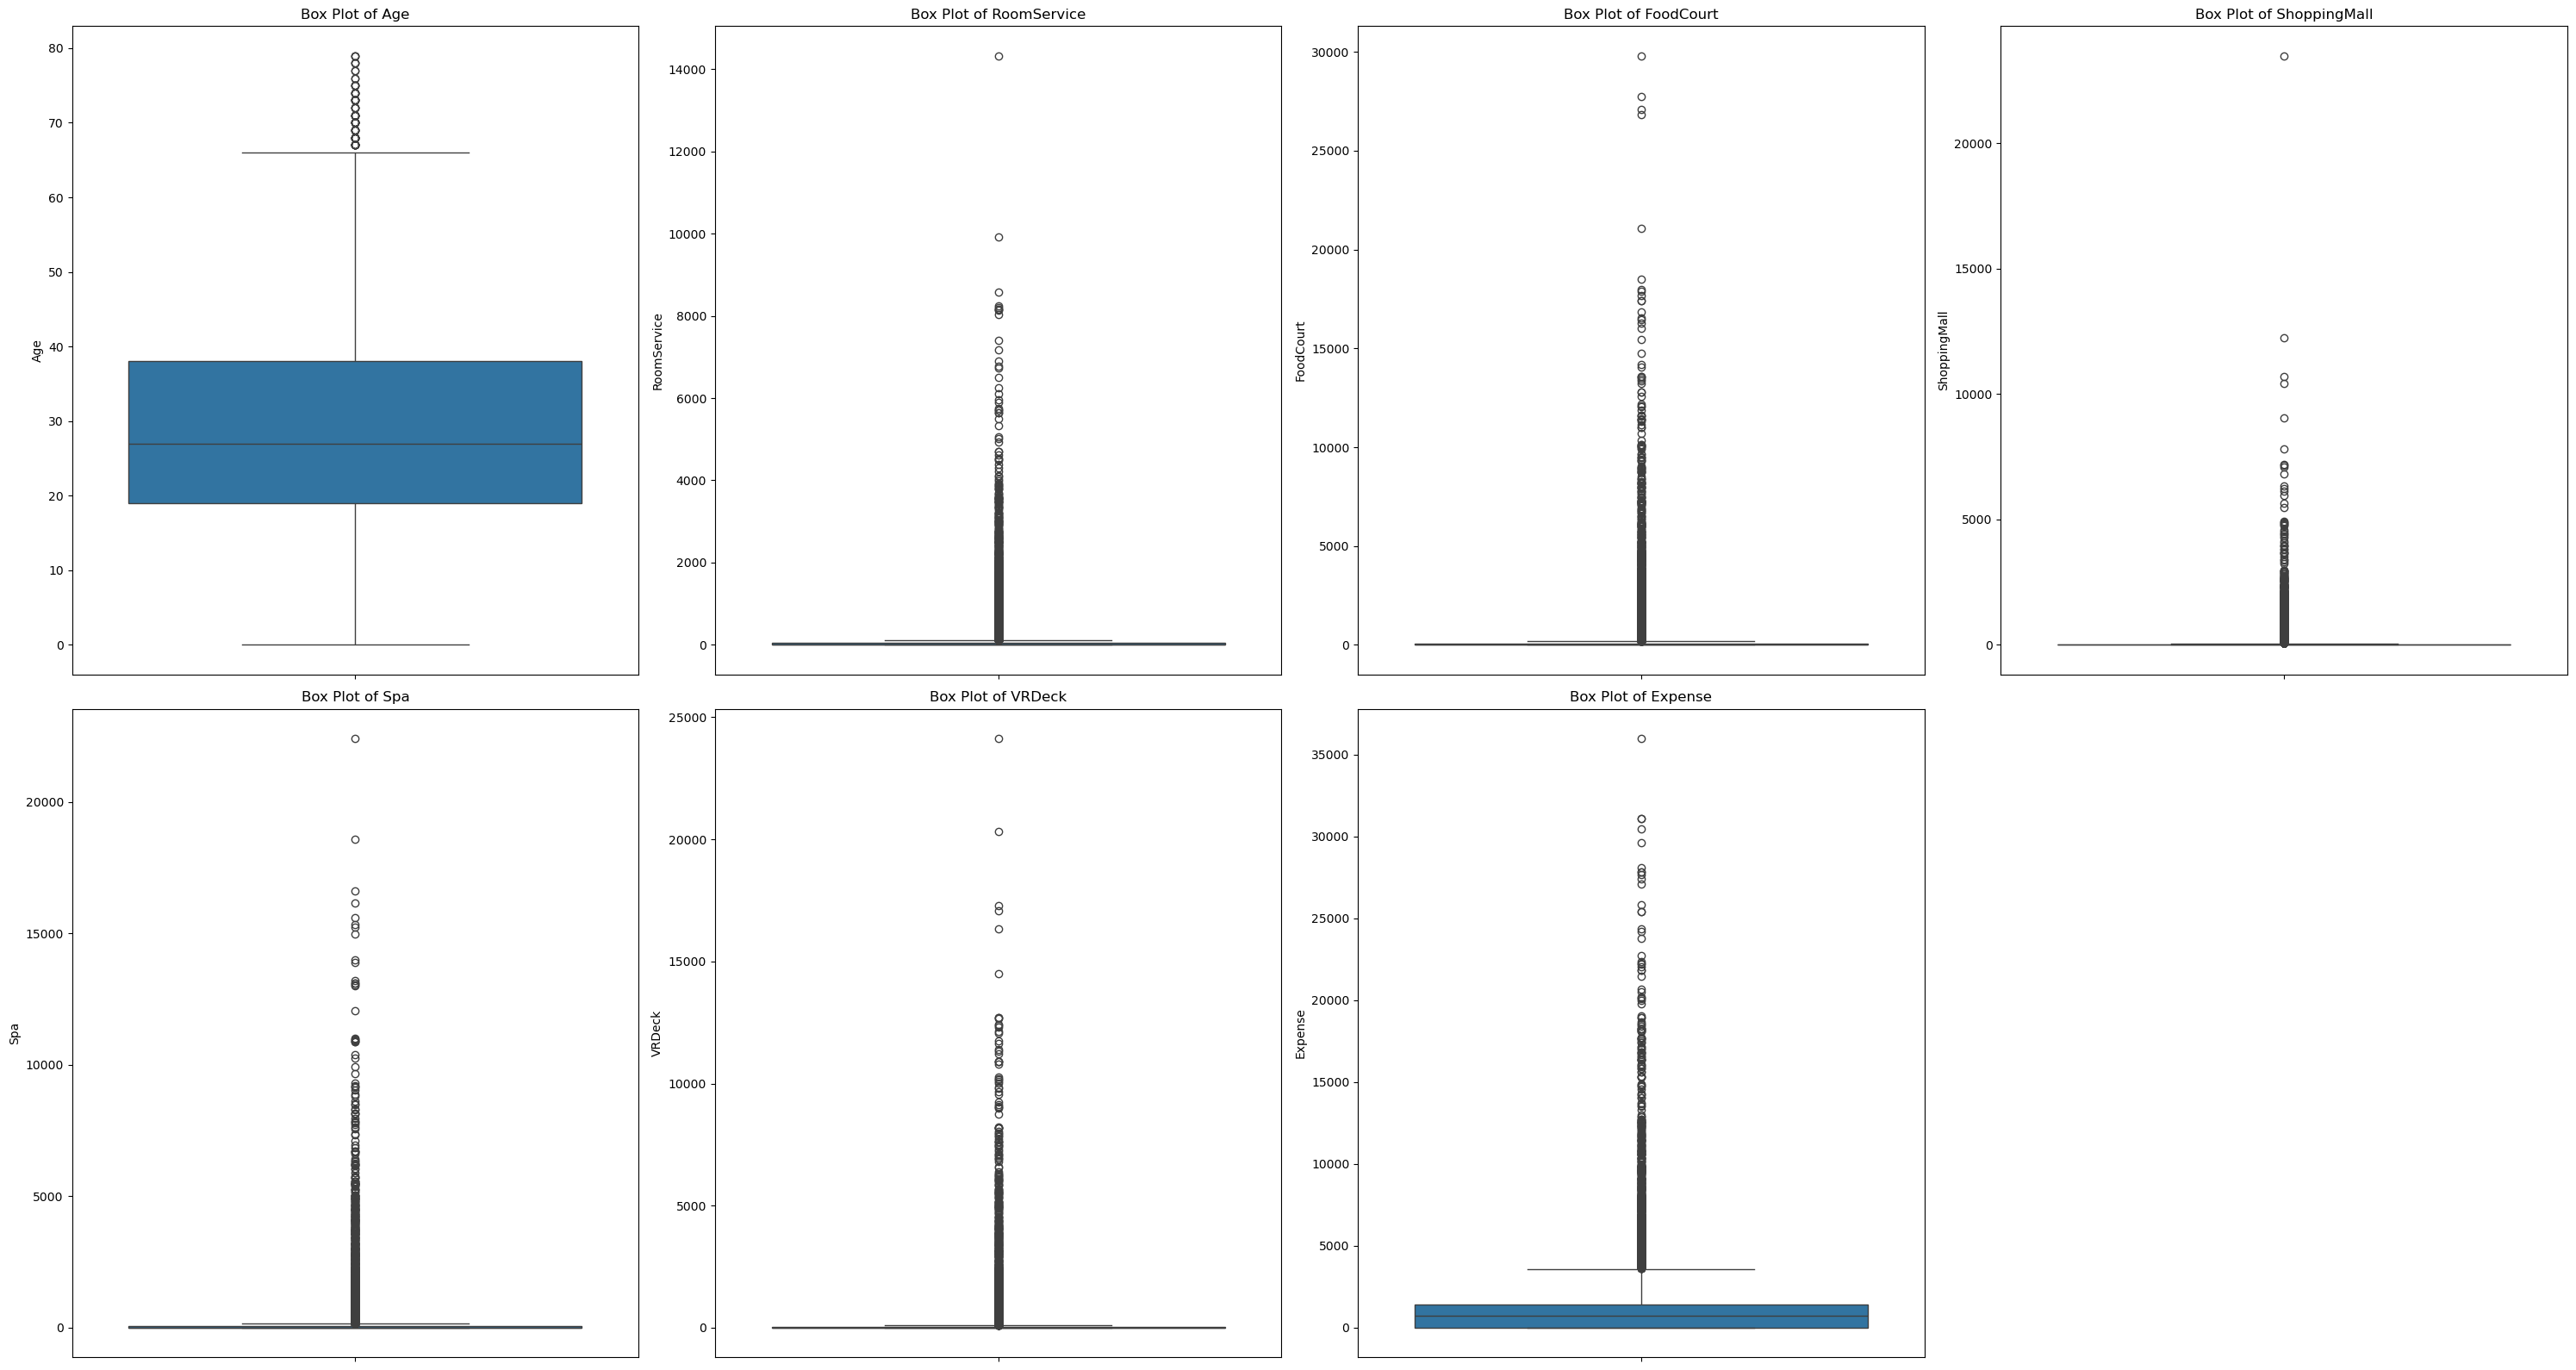

In [154]:
"""数値データ"""

# 分布の確認
# 2列構成のグラフを作成（4行と3行で配置）
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 16))  # 2列構成、4行で計8個のグラフスペースを用意
axes = axes.flatten()  # 2次元のaxesを1次元に変換

# 各カラムに対して独立した箱ひげ図を描画
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=train_df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# 残りの空のグラフを非表示にする（7つ目のグラフ以降のスペース）
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [155]:
# インスタンス作成
imputer = SimpleImputer(strategy="median")

train_df[numeric_cols] = imputer.fit_transform(train_df[numeric_cols])
# 出費の合計を再計算
train_df['Expense'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [156]:
train_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Group             0
Person            0
Deck            199
Num             199
Side            199
First_Name      200
Last_Name       200
Expense           0
dtype: int64

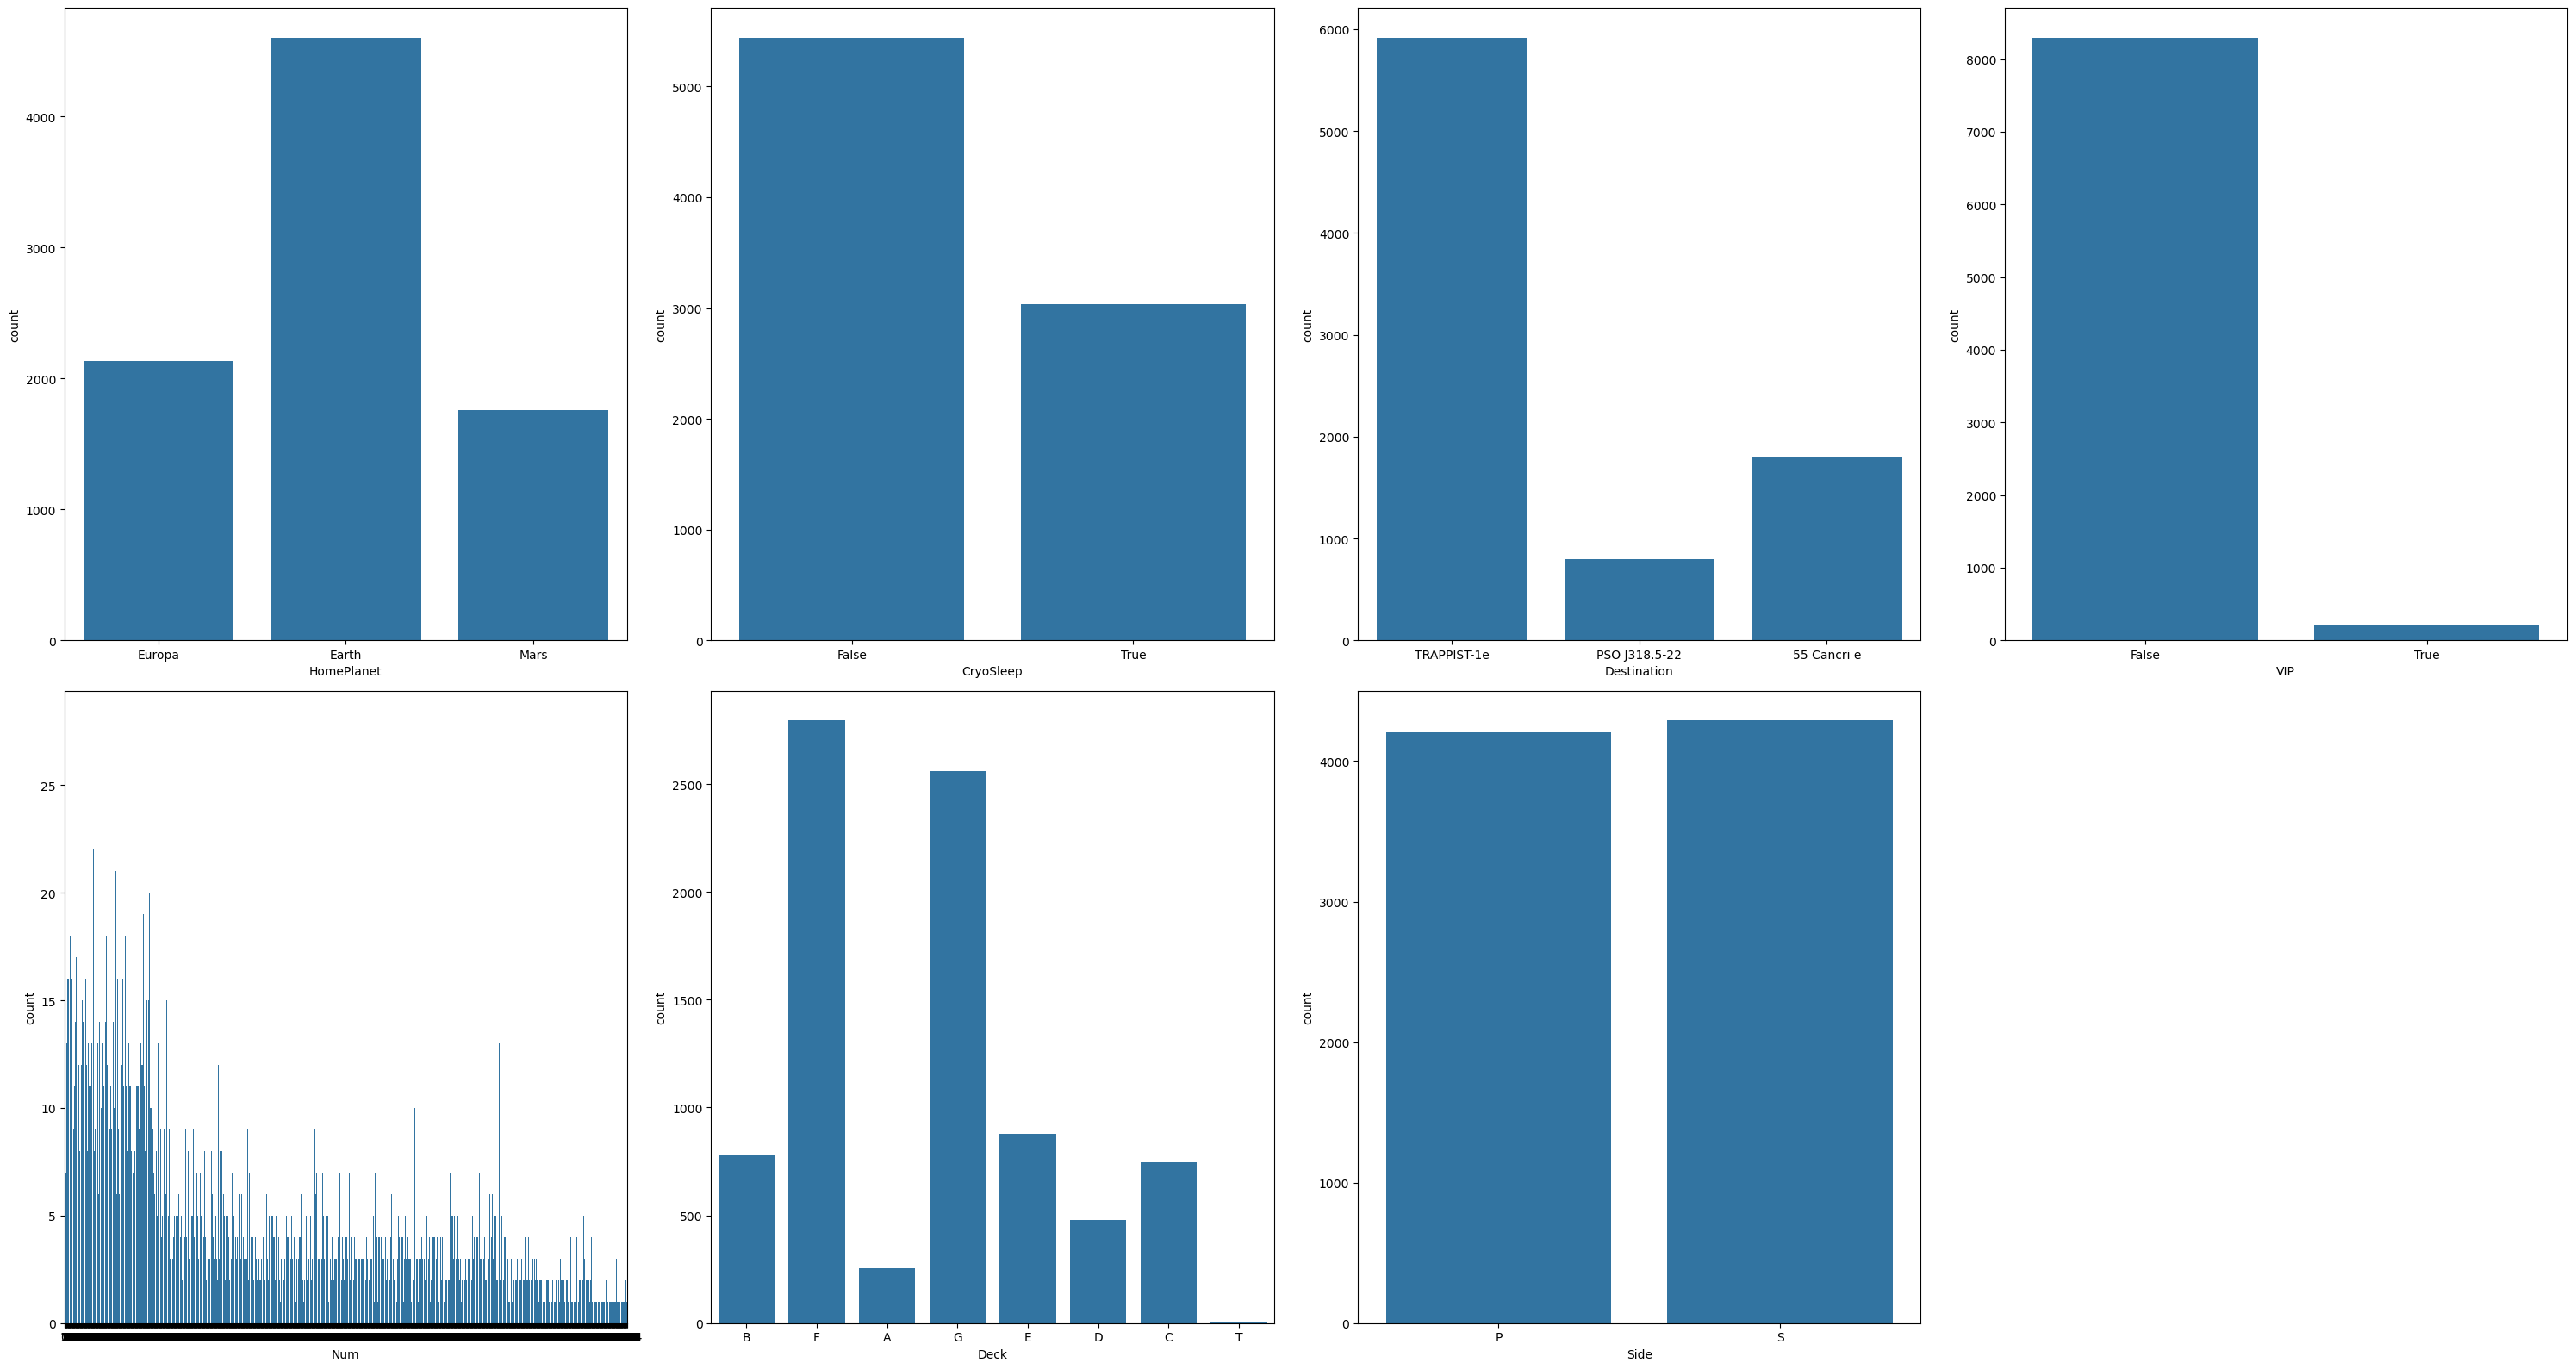

In [157]:
# カテゴリカル変数

# 分布の確認
# 2列構成のグラフを作成（4行と3行で配置）
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 16))  # 2列構成、4行で計8個のグラフスペースを用意
axes = axes.flatten()  # 2次元のaxesを1次元に変換

# 各カラムに対して独立した箱ひげ図を描画
for i, col in enumerate(categorical_cols):
    sns.countplot(data=train_df, x=col, ax=axes[i])  # カウントプロット
    plt.title(f'Distribution of {col}')

# 残りの空のグラフを非表示にする（7つ目のグラフ以降のスペース）
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [158]:
# インスタンス作成
imputer = SimpleImputer(strategy="most_frequent")

train_df[categorical_cols] = imputer.fit_transform(train_df[categorical_cols])

In [159]:
train_df.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Group             0
Person            0
Deck              0
Num               0
Side              0
First_Name      200
Last_Name       200
Expense           0
dtype: int64

In [160]:
"""Name"""
train_df['First_Name'].fillna('Unknown', inplace=True)
train_df['Last_Name'].fillna('Unknown', inplace=True)

In [161]:
train_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Group           0
Person          0
Deck            0
Num             0
Side            0
First_Name      0
Last_Name       0
Expense         0
dtype: int64

In [162]:
# 欠損値処理の関数化
def clean(df):
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

    df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

    df['Expense'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

    df['First_Name'].fillna('Unknown', inplace=True)
    df['Last_Name'].fillna('Unknown', inplace=True)

In [163]:
clean(test_df)

### エンコーディング

In [164]:
from sklearn.preprocessing import LabelEncoder

In [165]:
enc_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Side', 'Num', "Deck"]

le = LabelEncoder()

for col in enc_cols:
    train_df[col] = le.fit_transform(train_df[col].astype(str))

In [166]:
#Dropping the columns that dont have significance in data modelling
d_cols = ['Group', 'Person', 'First_Name', 'Last_Name']

train_df.drop(d_cols, axis=1, inplace=True)

In [167]:
# エンコーディング/カラム削除の関数化
def fe_eng(df):
    le_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Side', 'Num', "Deck"]
    label_encoder = LabelEncoder()

    for col in le_cols:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

    d_cols = ['Group', 'Person', 'First_Name', 'Last_Name']

    df.drop(d_cols, axis=1, inplace=True)

In [168]:
fe_eng(test_df)

In [169]:
train_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
Expense         0
dtype: int64

In [170]:
test_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
Expense         0
dtype: int64

## 3. データ分割

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
# 説明変数と目的変数に分割
# ベースラインモデル用
# X = train_df_encoded.drop(columns=["Transported"]).values
# y = train_df_encoded["Transported"].values

X = train_df.drop(columns=["Transported"]).values
y = train_df["Transported"].values

# 訓練データと検証データに分割
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [175]:
print(X_train.shape, X_test.shape)

(6085, 14) (2608, 14)


## 4. モデル学習
決定木モデルの精度比較

In [182]:
import lightgbm as lgb
import numpy as np

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [181]:
models = []
# models.append(("Logistic Regression", LogisticRegression()))
# models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
# models.append(('SVM', SVC()))
# models.append(('KNN', KNeighborsClassifier()))
models.append(('CatBoost', CatBoostClassifier()))
models.append(('LightGBM', lgb.LGBMClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('XGBoost', XGBClassifier()))
# models.append(('LinearSVC', LinearSVC()))
models.append(('GradientBoosting', GradientBoostingClassifier()))
# models.append(('GaussianNB', GaussianNB()))

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("cv_results", cv_results)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print()

cv_results [0.79697766 0.79815911 0.79224195 0.79618672]
Random Forest: 0.795891 (0.002221)

Learning rate set to 0.019699
0:	learn: 0.6825854	total: 63.1ms	remaining: 1m 3s
1:	learn: 0.6739508	total: 64.4ms	remaining: 32.1s
2:	learn: 0.6638473	total: 65.7ms	remaining: 21.8s
3:	learn: 0.6561179	total: 66.9ms	remaining: 16.7s
4:	learn: 0.6486700	total: 68.1ms	remaining: 13.5s
5:	learn: 0.6411458	total: 69.3ms	remaining: 11.5s
6:	learn: 0.6334795	total: 70.4ms	remaining: 9.99s
7:	learn: 0.6265222	total: 71.6ms	remaining: 8.88s
8:	learn: 0.6200513	total: 72.8ms	remaining: 8.01s
9:	learn: 0.6129829	total: 73.9ms	remaining: 7.32s
10:	learn: 0.6063565	total: 75.1ms	remaining: 6.75s
11:	learn: 0.6014704	total: 76.3ms	remaining: 6.28s
12:	learn: 0.5960482	total: 77.6ms	remaining: 5.89s
13:	learn: 0.5898311	total: 78.9ms	remaining: 5.55s
14:	learn: 0.5849103	total: 80.1ms	remaining: 5.26s
15:	learn: 0.5807618	total: 81.3ms	remaining: 5s
16:	learn: 0.5755690	total: 82.6ms	remaining: 4.78s
17:	le

In [183]:
# 最適なモデルの選択
best_model_idx = np.argmax([result.mean() for result in results])
best_model_name = names[best_model_idx]
best_model_accuracy = results[best_model_idx].mean()

print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}.")

The best model is CatBoost with an accuracy of 0.8095.


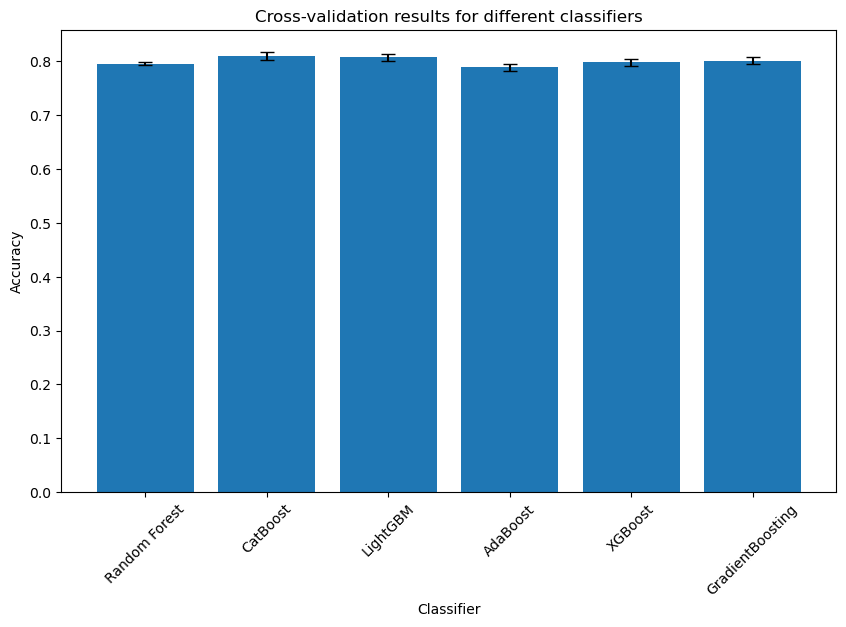

In [185]:
# 各モデルの精度（棒グラフ）
plt.figure(figsize=(10, 6))
plt.bar(names, [result.mean() for result in results], yerr=[result.std() for result in results], capsize=5)
plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Cross-validation results for different classifiers')
plt.show()

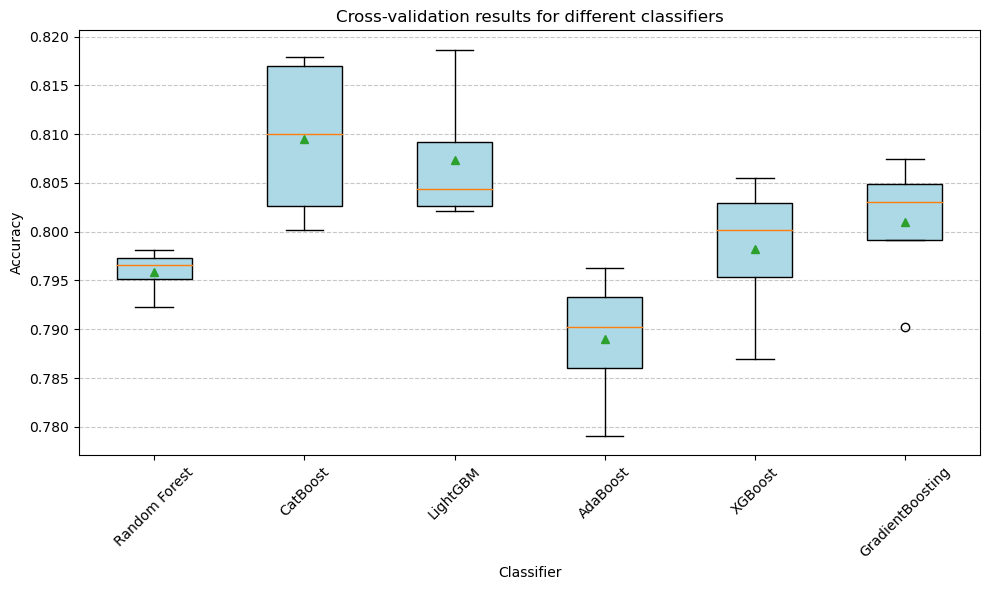

In [186]:
# 各モデルの精度（箱ひげ図）
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names, showmeans=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Cross-validation results for different classifiers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Oputunaを用いたハイパラチューニング

In [188]:
import optuna

from sklearn.metrics import accuracy_score

In [206]:
model = CatBoostClassifier(
    random_state=42
)

In [190]:
"""ナイーブな実装"""

# 目的関数の定義
def objective(trial):

    # チューニングするハイパーパラメータの設定
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "num_leaves": trial.suggest_int("num_leaves", 3, 50),
        "max_depth": trial.suggest_int("max_depth", 2, 50),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),  # 説明変数のサブサンプリング率
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),  # データのサブサンプリング率
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),                # バギングの頻度
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
    }

    # LightGBMモデルの構築
    model_optuna = lgb.LGBMClassifier(**params, random_state=42)

    # 学習（ハイパラ探索）
    model_optuna.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        callbacks=[
            lgb.early_stopping(stopping_rounds=50, verbose=True),
            lgb.log_evaluation(10)
        ],
    )

    # 予測
    y_pred = model_optuna.predict(X_test)

    # accuracyの計算
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)

    return acc

# Optunaによる最適化の実行
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2024-09-16 12:56:30,181] A new study created in memory with name: no-name-83490649-e15d-47aa-b032-f35e9891c2fa
[I 2024-09-16 12:56:30,264] Trial 0 finished with value: 0.8013803680981595 and parameters: {'learning_rate': 0.19638599334953796, 'num_leaves': 12, 'max_depth': 2, 'feature_fraction': 0.5458596073556191, 'bagging_fraction': 0.5422298457822504, 'bagging_freq': 2, 'reg_alpha': 1.3224122155714308, 'reg_lambda': 2.171808761446253}. Best is trial 0 with value: 0.8013803680981595.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5458596073556191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5458596073556191
[LightGBM] [Warning] bagging_fraction is set=0.5422298457822504, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5422298457822504
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5458596073556191, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5458596073556191
[LightGBM] [Warning] bagging_fraction is set=0.5422298457822504, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5422298457822504
[LightGBM] [Info] Number of positive: 3065, number of negative: 3020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001620 seconds.
You can s

[I 2024-09-16 12:56:30,393] Trial 1 finished with value: 0.8029141104294478 and parameters: {'learning_rate': 0.2933966148718462, 'num_leaves': 22, 'max_depth': 9, 'feature_fraction': 0.9937220788779053, 'bagging_fraction': 0.9430855054623699, 'bagging_freq': 6, 'reg_alpha': 3.5115586606946563, 'reg_lambda': 4.73133411568933}. Best is trial 1 with value: 0.8029141104294478.
[I 2024-09-16 12:56:30,431] Trial 2 finished with value: 0.8002300613496932 and parameters: {'learning_rate': 0.16065959872254912, 'num_leaves': 4, 'max_depth': 48, 'feature_fraction': 0.8508173593540721, 'bagging_fraction': 0.6002562078952413, 'bagging_freq': 4, 'reg_alpha': 0.4641581808951978, 'reg_lambda': 2.5242894992220815}. Best is trial 1 with value: 0.8029141104294478.
[I 2024-09-16 12:56:30,545] Trial 3 finished with value: 0.7983128834355828 and parameters: {'learning_rate': 0.12172147809158022, 'num_leaves': 9, 'max_depth': 16, 'feature_fraction': 0.7718141184984897, 'bagging_fraction': 0.4508466893783845

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8508173593540721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8508173593540721
[LightGBM] [Warning] bagging_fraction is set=0.6002562078952413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6002562078952413
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8508173593540721, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8508173593540721
[LightGBM] [Warning] bagging_fraction is set=0.6002562078952413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6002562078952413
[LightGBM] [Info] Number of positive: 3065, number of negative: 3020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can s

[I 2024-09-16 12:56:30,689] Trial 4 finished with value: 0.8009969325153374 and parameters: {'learning_rate': 0.33302348099320495, 'num_leaves': 16, 'max_depth': 7, 'feature_fraction': 0.9713706625453484, 'bagging_fraction': 0.7315662515842565, 'bagging_freq': 2, 'reg_alpha': 1.2178700616098659, 'reg_lambda': 4.0520772255432504}. Best is trial 1 with value: 0.8029141104294478.


[20]	valid_0's binary_logloss: 0.399624
[30]	valid_0's binary_logloss: 0.398177
[40]	valid_0's binary_logloss: 0.397039
[50]	valid_0's binary_logloss: 0.395858
[60]	valid_0's binary_logloss: 0.401198
[70]	valid_0's binary_logloss: 0.404026
[80]	valid_0's binary_logloss: 0.405412
[90]	valid_0's binary_logloss: 0.407597
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.394401
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9713706625453484, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9713706625453484
[LightGBM] [Warning] bagging_fraction is set=0.7315662515842565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7315662515842565
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5363307036227387, colsample_bytree=1.0 wi

[I 2024-09-16 12:56:30,881] Trial 5 finished with value: 0.8002300613496932 and parameters: {'learning_rate': 0.1488233960626713, 'num_leaves': 40, 'max_depth': 13, 'feature_fraction': 0.5363307036227387, 'bagging_fraction': 0.6738554032253289, 'bagging_freq': 6, 'reg_alpha': 4.181856712049225, 'reg_lambda': 2.5342644232100335}. Best is trial 1 with value: 0.8029141104294478.
[I 2024-09-16 12:56:30,969] Trial 6 finished with value: 0.7975460122699386 and parameters: {'learning_rate': 0.16788118807183783, 'num_leaves': 12, 'max_depth': 41, 'feature_fraction': 0.5675498354670372, 'bagging_fraction': 0.7403440195389037, 'bagging_freq': 7, 'reg_alpha': 4.453191989032897, 'reg_lambda': 0.5840868144496131}. Best is trial 1 with value: 0.8029141104294478.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_logloss: 0.395783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's binary_logloss: 0.395734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[I 2024-09-16 12:56:31,023] Trial 7 finished with value: 0.8055981595092024 and parameters: {'learning_rate': 0.43577097332855547, 'num_leaves': 12, 'max_depth': 25, 'feature_fraction': 0.8582418300050398, 'bagging_fraction': 0.431303386862248, 'bagging_freq': 7, 'reg_alpha': 1.0144952763324762, 'reg_lambda': 3.4726596507015675}. Best is trial 7 with value: 0.8055981595092024.
[I 2024-09-16 12:56:31,152] Trial 8 finished with value: 0.8021472392638037 and parameters: {'learning_rate': 0.305630863357686, 'num_leaves': 17, 'max_depth': 28, 'feature_fraction': 0.406905702980614, 'bagging_fraction': 0.9329098562057725, 'bagging_freq': 6, 'reg_alpha': 3.9190603650825584, 'reg_lambda': 3.4791371196380956}. Best is trial 7 with value: 0.8055981595092024.


[70]	valid_0's binary_logloss: 0.414928
[80]	valid_0's binary_logloss: 0.417778
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.400094
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8582418300050398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8582418300050398
[LightGBM] [Warning] bagging_fraction is set=0.431303386862248, subsample=1.0 will be ignored. Current value: bagging_fraction=0.431303386862248
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.406905702980614, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.406905702980614
[LightGBM] [Warning] bagging_fraction is set=0.9329098562057725, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9329098562057725
[LightGBM] [Warning] bagging_fr

[I 2024-09-16 12:56:31,268] Trial 9 finished with value: 0.7998466257668712 and parameters: {'learning_rate': 0.36891374062534216, 'num_leaves': 29, 'max_depth': 38, 'feature_fraction': 0.48443669411918183, 'bagging_fraction': 0.4279882935172372, 'bagging_freq': 2, 'reg_alpha': 1.0177341995171807, 'reg_lambda': 3.5629780905197395}. Best is trial 7 with value: 0.8055981595092024.


[30]	valid_0's binary_logloss: 0.415607
[40]	valid_0's binary_logloss: 0.419812
[50]	valid_0's binary_logloss: 0.419117
[60]	valid_0's binary_logloss: 0.426186
[70]	valid_0's binary_logloss: 0.42709
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.413055
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.48443669411918183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48443669411918183
[LightGBM] [Warning] bagging_fraction is set=0.4279882935172372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4279882935172372
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.677508306631926, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.677508306631926
[LightGBM] [Warning] bagging_fraction is set=0.82298661

[I 2024-09-16 12:56:31,460] Trial 10 finished with value: 0.7944785276073619 and parameters: {'learning_rate': 0.49522213450959035, 'num_leaves': 49, 'max_depth': 24, 'feature_fraction': 0.677508306631926, 'bagging_fraction': 0.8229866125428194, 'bagging_freq': 4, 'reg_alpha': 2.5113986865139273, 'reg_lambda': 0.3809054116295303}. Best is trial 7 with value: 0.8055981595092024.
[I 2024-09-16 12:56:31,610] Trial 11 finished with value: 0.7933282208588958 and parameters: {'learning_rate': 0.024554706072210747, 'num_leaves': 26, 'max_depth': 25, 'feature_fraction': 0.99410999108279, 'bagging_fraction': 0.9768393032597701, 'bagging_freq': 7, 'reg_alpha': 2.867968654682052, 'reg_lambda': 4.955359543790027}. Best is trial 7 with value: 0.8055981595092024.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_logloss: 0.414828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's binary_logloss: 0.424733
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.401843
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.677508306631926, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6

[I 2024-09-16 12:56:31,734] Trial 12 finished with value: 0.8071319018404908 and parameters: {'learning_rate': 0.44751424660173195, 'num_leaves': 24, 'max_depth': 16, 'feature_fraction': 0.8826295951656328, 'bagging_fraction': 0.846716612524619, 'bagging_freq': 5, 'reg_alpha': 3.196384212291058, 'reg_lambda': 4.6423107912776755}. Best is trial 12 with value: 0.8071319018404908.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8826295951656328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8826295951656328
[LightGBM] [Warning] bagging_fraction is set=0.846716612524619, subsample=1.0 will be ignored. Current value: bagging_fraction=0.846716612524619
[LightGBM] [Info] Number of positive: 3065, number of negative: 3020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1882
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 14
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8826295951656328,

[I 2024-09-16 12:56:31,878] Trial 13 finished with value: 0.8025306748466258 and parameters: {'learning_rate': 0.45398308025912426, 'num_leaves': 35, 'max_depth': 21, 'feature_fraction': 0.8481950787232085, 'bagging_fraction': 0.8454382369784553, 'bagging_freq': 5, 'reg_alpha': 2.009301048799511, 'reg_lambda': 4.108078441057913}. Best is trial 12 with value: 0.8071319018404908.
[I 2024-09-16 12:56:31,963] Trial 14 finished with value: 0.7956288343558282 and parameters: {'learning_rate': 0.40389608375340796, 'num_leaves': 20, 'max_depth': 31, 'feature_fraction': 0.8896589944490106, 'bagging_fraction': 0.8249408494984055, 'bagging_freq': 5, 'reg_alpha': 0.023217612122923392, 'reg_lambda': 3.0934779086014768}. Best is trial 12 with value: 0.8071319018404908.


[50]	valid_0's binary_logloss: 0.417142
[60]	valid_0's binary_logloss: 0.420288
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.403324
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8481950787232085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8481950787232085
[LightGBM] [Warning] bagging_fraction is set=0.8454382369784553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8454382369784553
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8896589944490106, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8896589944490106
[LightGBM] [Warning] bagging_fraction is set=0.8249408494984055, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8249408494984055
[LightGBM] [Warning] baggin

[I 2024-09-16 12:56:32,061] Trial 15 finished with value: 0.7937116564417178 and parameters: {'learning_rate': 0.43242787232304886, 'num_leaves': 3, 'max_depth': 17, 'feature_fraction': 0.7240071853358565, 'bagging_fraction': 0.5409864005564972, 'bagging_freq': 5, 'reg_alpha': 3.032640154366301, 'reg_lambda': 1.3113165210543847}. Best is trial 12 with value: 0.8071319018404908.
[I 2024-09-16 12:56:32,197] Trial 16 finished with value: 0.7983128834355828 and parameters: {'learning_rate': 0.48032193693300346, 'num_leaves': 32, 'max_depth': 34, 'feature_fraction': 0.8874518236331224, 'bagging_fraction': 0.6898926934326768, 'bagging_freq': 3, 'reg_alpha': 2.1199173477890074, 'reg_lambda': 4.345644753753358}. Best is trial 12 with value: 0.8071319018404908.


[90]	valid_0's binary_logloss: 0.416439
[100]	valid_0's binary_logloss: 0.414054
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.414054
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7240071853358565, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7240071853358565
[LightGBM] [Warning] bagging_fraction is set=0.5409864005564972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5409864005564972
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8874518236331224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8874518236331224
[LightGBM] [Warning] bagging_fraction is set=0.6898926934326768, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6898926934326768
[LightGBM] [

[I 2024-09-16 12:56:32,394] Trial 17 finished with value: 0.8075153374233128 and parameters: {'learning_rate': 0.24205789896542884, 'num_leaves': 25, 'max_depth': 19, 'feature_fraction': 0.7906524601398112, 'bagging_fraction': 0.8806937944378821, 'bagging_freq': 7, 'reg_alpha': 3.5373090131102938, 'reg_lambda': 3.3310687897438234}. Best is trial 17 with value: 0.8075153374233128.


[30]	valid_0's binary_logloss: 0.401141
[40]	valid_0's binary_logloss: 0.397622
[50]	valid_0's binary_logloss: 0.397472
[60]	valid_0's binary_logloss: 0.398475
[70]	valid_0's binary_logloss: 0.398854
[80]	valid_0's binary_logloss: 0.400031
[90]	valid_0's binary_logloss: 0.400705
[100]	valid_0's binary_logloss: 0.40069
Did not meet early stopping. Best iteration is:
[54]	valid_0's binary_logloss: 0.396535
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7906524601398112, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7906524601398112
[LightGBM] [Warning] bagging_fraction is set=0.8806937944378821, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8806937944378821
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7588207475996852, colsample_

[I 2024-09-16 12:56:32,645] Trial 18 finished with value: 0.8075153374233128 and parameters: {'learning_rate': 0.25215004565713367, 'num_leaves': 40, 'max_depth': 19, 'feature_fraction': 0.7588207475996852, 'bagging_fraction': 0.8892611651534179, 'bagging_freq': 4, 'reg_alpha': 3.6014075113358572, 'reg_lambda': 2.950340613441}. Best is trial 17 with value: 0.8075153374233128.


[40]	valid_0's binary_logloss: 0.396116
[50]	valid_0's binary_logloss: 0.397218
[60]	valid_0's binary_logloss: 0.398266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_logloss: 0.399475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's binary_logloss: 0.398992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's binary_logloss: 0.400493
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.395963
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7588207475996852, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7588207475996852
[LightGBM] [Warning] bagging_fraction is set=0.8

[I 2024-09-16 12:56:32,829] Trial 19 finished with value: 0.8063650306748467 and parameters: {'learning_rate': 0.24720894435776908, 'num_leaves': 41, 'max_depth': 9, 'feature_fraction': 0.6927491960928355, 'bagging_fraction': 0.9007642992877226, 'bagging_freq': 3, 'reg_alpha': 4.737998109819461, 'reg_lambda': 1.447693156230683}. Best is trial 17 with value: 0.8075153374233128.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_logloss: 0.39265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's binary_logloss: 0.395004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary

[I 2024-09-16 12:56:33,029] Trial 20 finished with value: 0.8021472392638037 and parameters: {'learning_rate': 0.2340838704674233, 'num_leaves': 50, 'max_depth': 21, 'feature_fraction': 0.6238820033453926, 'bagging_fraction': 0.7694431501232488, 'bagging_freq': 1, 'reg_alpha': 3.6945482436194315, 'reg_lambda': 2.9846687004943364}. Best is trial 17 with value: 0.8075153374233128.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's binary_logloss: 0.398159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[I 2024-09-16 12:56:33,180] Trial 21 finished with value: 0.8090490797546013 and parameters: {'learning_rate': 0.2273556626742009, 'num_leaves': 25, 'max_depth': 17, 'feature_fraction': 0.7770253851236728, 'bagging_fraction': 0.8797756404146756, 'bagging_freq': 5, 'reg_alpha': 3.1569278044342752, 'reg_lambda': 4.466106230888318}. Best is trial 21 with value: 0.8090490797546013.


[80]	valid_0's binary_logloss: 0.394818
[90]	valid_0's binary_logloss: 0.396507
[100]	valid_0's binary_logloss: 0.396322
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.391647
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7770253851236728, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7770253851236728
[LightGBM] [Warning] bagging_fraction is set=0.8797756404146756, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8797756404146756
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7898026557570061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7898026557570061
[LightGBM] [Warning] bagging_fraction is set=0.8855909184486402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.885

[I 2024-09-16 12:56:33,376] Trial 22 finished with value: 0.8040644171779141 and parameters: {'learning_rate': 0.10173167678489137, 'num_leaves': 37, 'max_depth': 19, 'feature_fraction': 0.7898026557570061, 'bagging_fraction': 0.8855909184486402, 'bagging_freq': 4, 'reg_alpha': 3.466505690987022, 'reg_lambda': 3.774413652638194}. Best is trial 21 with value: 0.8090490797546013.
[I 2024-09-16 12:56:33,521] Trial 23 finished with value: 0.8059815950920245 and parameters: {'learning_rate': 0.21410876795772776, 'num_leaves': 29, 'max_depth': 11, 'feature_fraction': 0.7646253727525786, 'bagging_fraction': 0.9862026048997636, 'bagging_freq': 3, 'reg_alpha': 2.6040276727053566, 'reg_lambda': 2.987350409264077}. Best is trial 21 with value: 0.8090490797546013.


[100]	valid_0's binary_logloss: 0.394237
Did not meet early stopping. Best iteration is:
[94]	valid_0's binary_logloss: 0.393511
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7898026557570061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7898026557570061
[LightGBM] [Warning] bagging_fraction is set=0.8855909184486402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8855909184486402
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7646253727525786, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7646253727525786
[LightGBM] [Warning] bagging_fraction is set=0.9862026048997636, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9862026048997636
[LightGBM] [Warning] bagging_freq is set=3, subsample

[I 2024-09-16 12:56:33,637] Trial 24 finished with value: 0.8009969325153374 and parameters: {'learning_rate': 0.28714445611025907, 'num_leaves': 45, 'max_depth': 5, 'feature_fraction': 0.6416333548525781, 'bagging_fraction': 0.7902751365296758, 'bagging_freq': 6, 'reg_alpha': 4.074447846286604, 'reg_lambda': 4.303434540304675}. Best is trial 21 with value: 0.8090490797546013.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.396488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_logloss: 0.392537
[LightGBM] [Warning]

[I 2024-09-16 12:56:33,824] Trial 25 finished with value: 0.8052147239263804 and parameters: {'learning_rate': 0.2731700313998753, 'num_leaves': 32, 'max_depth': 13, 'feature_fraction': 0.8051657772526676, 'bagging_fraction': 0.8947542010144126, 'bagging_freq': 4, 'reg_alpha': 2.0138960507455783, 'reg_lambda': 1.8069735229087915}. Best is trial 21 with value: 0.8090490797546013.
[I 2024-09-16 12:56:33,925] Trial 26 finished with value: 0.8009969325153374 and parameters: {'learning_rate': 0.32599619767183236, 'num_leaves': 19, 'max_depth': 22, 'feature_fraction': 0.7521431087192151, 'bagging_fraction': 0.9376513887995853, 'bagging_freq': 5, 'reg_alpha': 4.925535174765134, 'reg_lambda': 3.184909179433835}. Best is trial 21 with value: 0.8090490797546013.


[60]	valid_0's binary_logloss: 0.397016
[70]	valid_0's binary_logloss: 0.399269
[80]	valid_0's binary_logloss: 0.401656
[90]	valid_0's binary_logloss: 0.404224
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.393973
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8051657772526676, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8051657772526676
[LightGBM] [Warning] bagging_fraction is set=0.8947542010144126, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8947542010144126
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7521431087192151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7521431087192151
[LightGBM] [Warning] bagging_fraction is set=0.9376513887995853, subsample=1.0 will be ignored

[I 2024-09-16 12:56:34,104] Trial 27 finished with value: 0.7998466257668712 and parameters: {'learning_rate': 0.07827784291428033, 'num_leaves': 28, 'max_depth': 28, 'feature_fraction': 0.9313909969508947, 'bagging_fraction': 0.6374549326215038, 'bagging_freq': 7, 'reg_alpha': 3.2406359870324177, 'reg_lambda': 3.846955322068002}. Best is trial 21 with value: 0.8090490797546013.


[30]	valid_0's binary_logloss: 0.435818
[40]	valid_0's binary_logloss: 0.42103
[50]	valid_0's binary_logloss: 0.412098
[60]	valid_0's binary_logloss: 0.406908
[70]	valid_0's binary_logloss: 0.401843
[80]	valid_0's binary_logloss: 0.399581
[90]	valid_0's binary_logloss: 0.399119
[100]	valid_0's binary_logloss: 0.399664
Did not meet early stopping. Best iteration is:
[85]	valid_0's binary_logloss: 0.398815
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9313909969508947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9313909969508947
[LightGBM] [Warning] bagging_fraction is set=0.6374549326215038, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6374549326215038
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7306933611750862, colsample_

[I 2024-09-16 12:56:34,283] Trial 28 finished with value: 0.7983128834355828 and parameters: {'learning_rate': 0.20003715117325804, 'num_leaves': 24, 'max_depth': 14, 'feature_fraction': 0.7306933611750862, 'bagging_fraction': 0.8742952448856177, 'bagging_freq': 6, 'reg_alpha': 4.412093023407793, 'reg_lambda': 2.777381936892702}. Best is trial 21 with value: 0.8090490797546013.


[20]	valid_0's binary_logloss: 0.413302
[30]	valid_0's binary_logloss: 0.40503
[40]	valid_0's binary_logloss: 0.401012
[50]	valid_0's binary_logloss: 0.397271
[60]	valid_0's binary_logloss: 0.398858
[70]	valid_0's binary_logloss: 0.398525
[80]	valid_0's binary_logloss: 0.399395
[90]	valid_0's binary_logloss: 0.399372
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.397201
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7306933611750862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7306933611750862
[LightGBM] [Warning] bagging_fraction is set=0.8742952448856177, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8742952448856177
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Wa

[I 2024-09-16 12:56:34,416] Trial 29 finished with value: 0.8006134969325154 and parameters: {'learning_rate': 0.2414727640135535, 'num_leaves': 32, 'max_depth': 18, 'feature_fraction': 0.818275485368739, 'bagging_fraction': 0.7917108482649764, 'bagging_freq': 3, 'reg_alpha': 3.644622922252921, 'reg_lambda': 2.042714237865125}. Best is trial 21 with value: 0.8090490797546013.
[I 2024-09-16 12:56:34,597] Trial 30 finished with value: 0.8021472392638037 and parameters: {'learning_rate': 0.36184906818703355, 'num_leaves': 36, 'max_depth': 32, 'feature_fraction': 0.6592124478152561, 'bagging_fraction': 0.9615363469120511, 'bagging_freq': 4, 'reg_alpha': 2.7706423815582024, 'reg_lambda': 4.428997157479272}. Best is trial 21 with value: 0.8090490797546013.


[80]	valid_0's binary_logloss: 0.398988
[90]	valid_0's binary_logloss: 0.400276
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.395377
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.818275485368739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.818275485368739
[LightGBM] [Warning] bagging_fraction is set=0.7917108482649764, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7917108482649764
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6592124478152561, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6592124478152561
[LightGBM] [Warning] bagging_fraction is set=0.9615363469120511, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9615363469120511
[LightGBM] [Warning] bagging_

[I 2024-09-16 12:56:34,676] Trial 31 finished with value: 0.8021472392638037 and parameters: {'learning_rate': 0.1904407138485495, 'num_leaves': 25, 'max_depth': 4, 'feature_fraction': 0.9291965056083062, 'bagging_fraction': 0.8499180637579559, 'bagging_freq': 5, 'reg_alpha': 3.1249451245943507, 'reg_lambda': 4.7211576712681005}. Best is trial 21 with value: 0.8090490797546013.
[I 2024-09-16 12:56:34,790] Trial 32 finished with value: 0.8071319018404908 and parameters: {'learning_rate': 0.26887466288634637, 'num_leaves': 25, 'max_depth': 15, 'feature_fraction': 0.8177189289394223, 'bagging_fraction': 0.9063295817910783, 'bagging_freq': 5, 'reg_alpha': 3.3143331318547276, 'reg_lambda': 4.699297080653734}. Best is trial 21 with value: 0.8090490797546013.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9291965056083062, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9291965056083062
[LightGBM] [Warning] bagging_fraction is set=0.8499180637579559, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8499180637579559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9291965056083062, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9291965056083062
[LightGBM] [Warning] bagging_fraction is set=0.8499180637579559, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8499180637579559
[LightGBM] [Info] Number of positive: 3065, number of negative: 3020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can s

[I 2024-09-16 12:56:34,915] Trial 33 finished with value: 0.7994631901840491 and parameters: {'learning_rate': 0.20105393733827762, 'num_leaves': 22, 'max_depth': 19, 'feature_fraction': 0.7281859402998627, 'bagging_fraction': 0.8588939668294605, 'bagging_freq': 6, 'reg_alpha': 3.8802353109908303, 'reg_lambda': 4.86141833253933}. Best is trial 21 with value: 0.8090490797546013.
[I 2024-09-16 12:56:35,017] Trial 34 finished with value: 0.8029141104294478 and parameters: {'learning_rate': 0.31446499126676325, 'num_leaves': 21, 'max_depth': 10, 'feature_fraction': 0.8970061011900169, 'bagging_fraction': 0.8114042864132628, 'bagging_freq': 4, 'reg_alpha': 2.3613303047751844, 'reg_lambda': 3.838613530391924}. Best is trial 21 with value: 0.8090490797546013.


[10]	valid_0's binary_logloss: 0.453116
[20]	valid_0's binary_logloss: 0.410997
[30]	valid_0's binary_logloss: 0.400559
[40]	valid_0's binary_logloss: 0.397681
[50]	valid_0's binary_logloss: 0.395511
[60]	valid_0's binary_logloss: 0.398177
[70]	valid_0's binary_logloss: 0.397195
[80]	valid_0's binary_logloss: 0.39762
[90]	valid_0's binary_logloss: 0.397756
[100]	valid_0's binary_logloss: 0.39772
Did not meet early stopping. Best iteration is:
[51]	valid_0's binary_logloss: 0.394998
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7281859402998627, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7281859402998627
[LightGBM] [Warning] bagging_fraction is set=0.8588939668294605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8588939668294605
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_fre

[I 2024-09-16 12:56:35,102] Trial 35 finished with value: 0.80329754601227 and parameters: {'learning_rate': 0.37327917822349205, 'num_leaves': 15, 'max_depth': 17, 'feature_fraction': 0.8391557902255146, 'bagging_fraction': 0.923199254403674, 'bagging_freq': 5, 'reg_alpha': 3.449167188044142, 'reg_lambda': 4.474091260648854}. Best is trial 21 with value: 0.8090490797546013.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8391557902255146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8391557902255146
[LightGBM] [Warning] bagging_fraction is set=0.923199254403674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.923199254403674
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8391557902255146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8391557902255146
[LightGBM] [Warning] bagging_fraction is set=0.923199254403674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.923199254403674
[LightGBM] [Info] Number of positive: 3065, number of negative: 3020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `

[I 2024-09-16 12:56:35,322] Trial 36 finished with value: 0.7986963190184049 and parameters: {'learning_rate': 0.22592826882328185, 'num_leaves': 7, 'max_depth': 22, 'feature_fraction': 0.7707983209728224, 'bagging_fraction': 0.7515774400342307, 'bagging_freq': 6, 'reg_alpha': 2.9278012610094906, 'reg_lambda': 2.343132180442809}. Best is trial 21 with value: 0.8090490797546013.
[I 2024-09-16 12:56:35,439] Trial 37 finished with value: 0.8002300613496932 and parameters: {'learning_rate': 0.1375144682230005, 'num_leaves': 23, 'max_depth': 12, 'feature_fraction': 0.7061609430816246, 'bagging_fraction': 0.5343200131025484, 'bagging_freq': 4, 'reg_alpha': 3.7515968904392425, 'reg_lambda': 2.731766436836597}. Best is trial 21 with value: 0.8090490797546013.


[30]	valid_0's binary_logloss: 0.410287
[40]	valid_0's binary_logloss: 0.406198
[50]	valid_0's binary_logloss: 0.401225
[60]	valid_0's binary_logloss: 0.397453
[70]	valid_0's binary_logloss: 0.395912
[80]	valid_0's binary_logloss: 0.396275
[90]	valid_0's binary_logloss: 0.395891
[100]	valid_0's binary_logloss: 0.395838
Did not meet early stopping. Best iteration is:
[95]	valid_0's binary_logloss: 0.395617
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7707983209728224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7707983209728224
[LightGBM] [Warning] bagging_fraction is set=0.7515774400342307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7515774400342307
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7061609430816246, colsample

[I 2024-09-16 12:56:35,574] Trial 38 finished with value: 0.8006134969325154 and parameters: {'learning_rate': 0.17234096644941613, 'num_leaves': 40, 'max_depth': 49, 'feature_fraction': 0.6033159816500737, 'bagging_fraction': 0.7098885352116305, 'bagging_freq': 7, 'reg_alpha': 4.298418008022855, 'reg_lambda': 4.139210003893021}. Best is trial 21 with value: 0.8090490797546013.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6033159816500737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6033159816500737
[LightGBM] [Warning] bagging_fraction is set=0.7098885352116305, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7098885352116305
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6033159816500737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6033159816500737
[LightGBM] [Warning] bagging_fraction is set=0.7098885352116305, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7098885352116305
[LightGBM] [Info] Number of positive: 3065, number of negative: 3020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can s

[I 2024-09-16 12:56:35,686] Trial 39 finished with value: 0.8105828220858896 and parameters: {'learning_rate': 0.26197423106860235, 'num_leaves': 28, 'max_depth': 7, 'feature_fraction': 0.9420541933871209, 'bagging_fraction': 0.9578430794066152, 'bagging_freq': 6, 'reg_alpha': 1.5840037273029002, 'reg_lambda': 3.372016708884251}. Best is trial 39 with value: 0.8105828220858896.
[I 2024-09-16 12:56:35,733] Trial 40 finished with value: 0.8006134969325154 and parameters: {'learning_rate': 0.26464680234117843, 'num_leaves': 44, 'max_depth': 2, 'feature_fraction': 0.9481423076627875, 'bagging_fraction': 0.9950481371441955, 'bagging_freq': 6, 'reg_alpha': 0.6463759697770213, 'reg_lambda': 3.3132785500338238}. Best is trial 39 with value: 0.8105828220858896.
[I 2024-09-16 12:56:35,831] Trial 41 finished with value: 0.8029141104294478 and parameters: {'learning_rate': 0.34276438865327463, 'num_leaves': 28, 'max_depth': 8, 'feature_fraction': 0.8725236401666222, 'bagging_fraction': 0.955881846

[70]	valid_0's binary_logloss: 0.395491
[80]	valid_0's binary_logloss: 0.396888
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.390631
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9420541933871209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9420541933871209
[LightGBM] [Warning] bagging_fraction is set=0.9578430794066152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9578430794066152
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9481423076627875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9481423076627875
[LightGBM] [Warning] bagging_fraction is set=0.9950481371441955, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9950481371441955
[LightGBM] [Warning] baggin

[I 2024-09-16 12:56:35,934] Trial 42 finished with value: 0.8044478527607362 and parameters: {'learning_rate': 0.18224453869346352, 'num_leaves': 18, 'max_depth': 15, 'feature_fraction': 0.9538874247642002, 'bagging_fraction': 0.9253635306262562, 'bagging_freq': 6, 'reg_alpha': 2.2867465418387045, 'reg_lambda': 2.609429422742811}. Best is trial 39 with value: 0.8105828220858896.
[I 2024-09-16 12:56:36,033] Trial 43 finished with value: 0.8044478527607362 and parameters: {'learning_rate': 0.2815491034703357, 'num_leaves': 15, 'max_depth': 27, 'feature_fraction': 0.9243847899832361, 'bagging_fraction': 0.8705221253911275, 'bagging_freq': 5, 'reg_alpha': 1.6756877042134133, 'reg_lambda': 3.3511645163445083}. Best is trial 39 with value: 0.8105828220858896.


[20]	valid_0's binary_logloss: 0.410091
[30]	valid_0's binary_logloss: 0.395183
[40]	valid_0's binary_logloss: 0.391171
[50]	valid_0's binary_logloss: 0.389822
[60]	valid_0's binary_logloss: 0.388442
[70]	valid_0's binary_logloss: 0.388984
[80]	valid_0's binary_logloss: 0.388861
[90]	valid_0's binary_logloss: 0.390052
[100]	valid_0's binary_logloss: 0.389536
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.388275
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9538874247642002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9538874247642002
[LightGBM] [Warning] bagging_fraction is set=0.9253635306262562, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9253635306262562
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fract

[I 2024-09-16 12:56:36,168] Trial 44 finished with value: 0.8048312883435583 and parameters: {'learning_rate': 0.30159742447076865, 'num_leaves': 34, 'max_depth': 7, 'feature_fraction': 0.9749935712881354, 'bagging_fraction': 0.8357324310564853, 'bagging_freq': 7, 'reg_alpha': 2.633773835641419, 'reg_lambda': 3.9297267447311226}. Best is trial 39 with value: 0.8105828220858896.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's binary_logloss: 0.400202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's binary_logloss: 0.397975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.397282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2024-09-16 12:56:36,294] Trial 45 finished with value: 0.8006134969325154 and parameters: {'learning_rate': 0.15252848644921418, 'num_leaves': 27, 'max_depth': 44, 'feature_fraction': 0.8335252034272624, 'bagging_fraction': 0.9486494747206393, 'bagging_freq': 6, 'reg_alpha': 3.9897739650826893, 'reg_lambda': 4.625906566181332}. Best is trial 39 with value: 0.8105828220858896.
[I 2024-09-16 12:56:36,398] Trial 46 finished with value: 0.8071319018404908 and parameters: {'learning_rate': 0.397801268012955, 'num_leaves': 30, 'max_depth': 23, 'feature_fraction': 0.9052066861819016, 'bagging_fraction': 0.9155088109744948, 'bagging_freq': 5, 'reg_alpha': 3.228595230878336, 'reg_lambda': 4.100458846501047}. Best is trial 39 with value: 0.8105828220858896.


[90]	valid_0's binary_logloss: 0.393274
[100]	valid_0's binary_logloss: 0.394319
Did not meet early stopping. Best iteration is:
[85]	valid_0's binary_logloss: 0.392861
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8335252034272624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8335252034272624
[LightGBM] [Warning] bagging_fraction is set=0.9486494747206393, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9486494747206393
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9052066861819016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9052066861819016
[LightGBM] [Warning] bagging_fraction is set=0.9155088109744948, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9155088109744948
[LightGBM] [W

[I 2024-09-16 12:56:36,580] Trial 47 finished with value: 0.8002300613496932 and parameters: {'learning_rate': 0.1229738337074289, 'num_leaves': 38, 'max_depth': 16, 'feature_fraction': 0.7939427399783936, 'bagging_fraction': 0.8117164934956599, 'bagging_freq': 5, 'reg_alpha': 3.5204844381662705, 'reg_lambda': 3.5862662685964732}. Best is trial 39 with value: 0.8105828220858896.
[I 2024-09-16 12:56:36,691] Trial 48 finished with value: 0.8071319018404908 and parameters: {'learning_rate': 0.24779318824594754, 'num_leaves': 21, 'max_depth': 20, 'feature_fraction': 0.8639664129889547, 'bagging_fraction': 0.8768599812144546, 'bagging_freq': 6, 'reg_alpha': 1.5578979157180064, 'reg_lambda': 2.868930706198612}. Best is trial 39 with value: 0.8105828220858896.


[50]	valid_0's binary_logloss: 0.401593
[60]	valid_0's binary_logloss: 0.399339
[70]	valid_0's binary_logloss: 0.397456
[80]	valid_0's binary_logloss: 0.396788
[90]	valid_0's binary_logloss: 0.396529
[100]	valid_0's binary_logloss: 0.39685
Did not meet early stopping. Best iteration is:
[87]	valid_0's binary_logloss: 0.39605
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7939427399783936, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7939427399783936
[LightGBM] [Warning] bagging_fraction is set=0.8117164934956599, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8117164934956599
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8639664129889547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8639664129889547
[L

[I 2024-09-16 12:56:36,867] Trial 49 finished with value: 0.7975460122699386 and parameters: {'learning_rate': 0.024793236039836963, 'num_leaves': 31, 'max_depth': 26, 'feature_fraction': 0.743548835715687, 'bagging_fraction': 0.7772450707556566, 'bagging_freq': 7, 'reg_alpha': 2.8861958478941134, 'reg_lambda': 3.1623618352558527}. Best is trial 39 with value: 0.8105828220858896.


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503698 -> initscore=0.014791
[LightGBM] [Info] Start training from score 0.014791
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's binary_logloss: 0.620849
[20]	valid_0's binary_logloss: 0.568214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's binary_logloss: 0.531401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.50565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_logloss: 0.486442
[60]	valid_0's binary_logloss: 0.470119
[70]	valid_0's binary_logloss: 0.4574
[80]	valid_0's binary_logloss: 0.447187
[90]	valid_0's binary_logloss: 0.438305


In [191]:
# 最適なパラメータの表示
print(study.best_params)

{'learning_rate': 0.26197423106860235, 'num_leaves': 28, 'max_depth': 7, 'feature_fraction': 0.9420541933871209, 'bagging_fraction': 0.9578430794066152, 'bagging_freq': 6, 'reg_alpha': 1.5840037273029002, 'reg_lambda': 3.372016708884251}


### Optunaで得られた最適なパラメータを用いたモデルの構築・学習

In [195]:
# モデル構築
best_model = lgb.LGBMClassifier(
    **study.best_params,
    n_estimators=10000,
    random_state=42,
    objective="binary"
)

# 学習
best_model.fit(
    X_train,
    y_train,
    eval_metric="accuracy",
    eval_set=[(X_test, y_test)],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(10)
    ]
)

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9420541933871209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9420541933871209
[LightGBM] [Warning] bagging_fraction is set=0.9578430794066152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9578430794066152
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9420541933871209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9420541933871209
[LightGBM] [Warning] bagging_fraction is set=0.9578430794066152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9578430794066152
[LightGBM] [Info] Number of positive: 3065, number of negative: 3020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001205 seconds.
You can s

LGBMClassifier(bagging_fraction=0.9578430794066152, bagging_freq=6,
               feature_fraction=0.9420541933871209,
               learning_rate=0.26197423106860235, max_depth=7,
               n_estimators=10000, num_leaves=28, objective='binary',
               random_state=42, reg_alpha=1.5840037273029002,
               reg_lambda=3.372016708884251)

## 5.モデル評価

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

from sklearn.metrics import confusion_matrix

In [197]:
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)

print(f"モデル精度（Accuracy）：{acc}")

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9420541933871209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9420541933871209
[LightGBM] [Warning] bagging_fraction is set=0.9578430794066152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9578430794066152
モデル精度（Accuracy）：0.8105828220858896


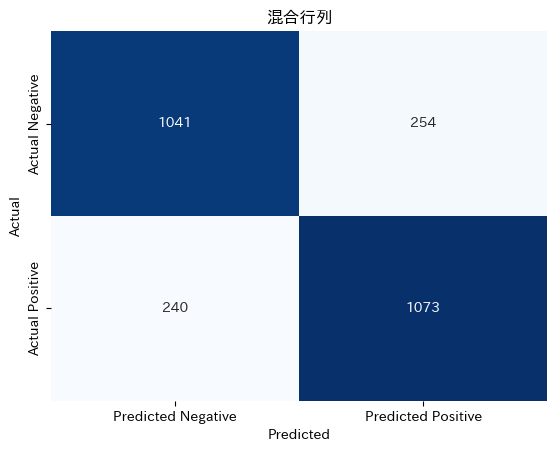

In [198]:
"""分類精度の可視化（ヒートマップ）"""
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# ヒートマップの描画
sns.heatmap(
    data=cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=["Predicted Negative", "Predicted Positive"],
    yticklabels=["Actual Negative", "Actual Positive"],
)

plt.title("混合行列")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

## 6. csvファイル出力

In [202]:
# テストデータ
test_df_origin = pd.read_csv("../data/test.csv")

In [203]:
# テストデータに対する予測
y_pred = best_model.predict(test_df).astype(bool)

# 提出用データフレームの作成
submission_df = pd.DataFrame(
    {
        "PassengerId": test_df_origin["PassengerId"],
        "Transported": y_pred,
    }
)

# 提出ファイルの作成
submission_df.to_csv("../submission/LightGBM_processed.csv", index=False)

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9420541933871209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9420541933871209
[LightGBM] [Warning] bagging_fraction is set=0.9578430794066152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9578430794066152


In [205]:
# モデルパラメータの保存
import json

file_name = "../params/LightGBM_processed.json"

# ハイパーパラメータを取得
params = best_model.get_params()

# パラメータをJSON形式で保存
with open(file_name, 'w') as f:
    json.dump(params, f, indent=4)

print(f"パラメータが '{file_name}' に保存されました。")

パラメータが '../params/LightGBM_processed.json' に保存されました。
